# TensorFlow

tensorflow는 구글이 개발한 Machine Learning Framework입니다. 

Tensor(여러 방향을 가진 벡터, 다차원 벡터 데이터) + Flow(데이터의 흐름) 

간단한 프로그램을 작성하는 것과 달리 인공지능 모델은 복잡하기 때문에 모든 코드를 직접 코딩하기 어렵습니다.

그렇기에 TenrsorFlow를 사용합니다.

# Keras

keras는 python으로 작성된 오픈소스 신경망 라이브러리입니다. TensorFlow, CNTK, or Theano 위에서 수행가능합니다. 

최근에 tensorflow와 합쳐졌습니다.

# 순서
## 1. Anaconda 설치
## 2. TensorFlow 설치

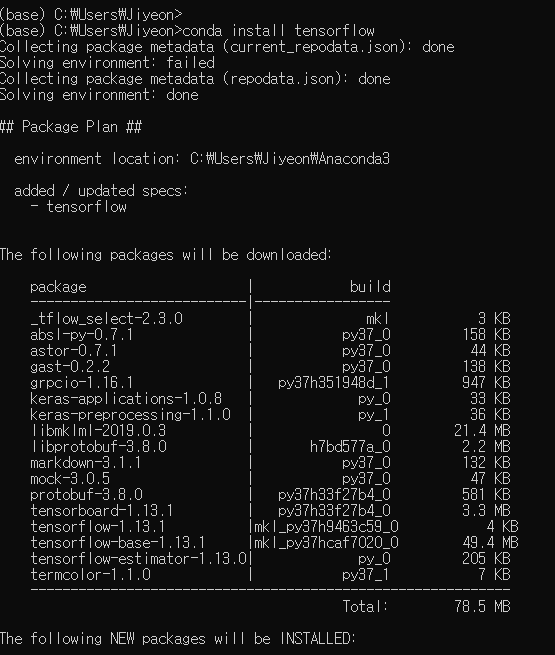

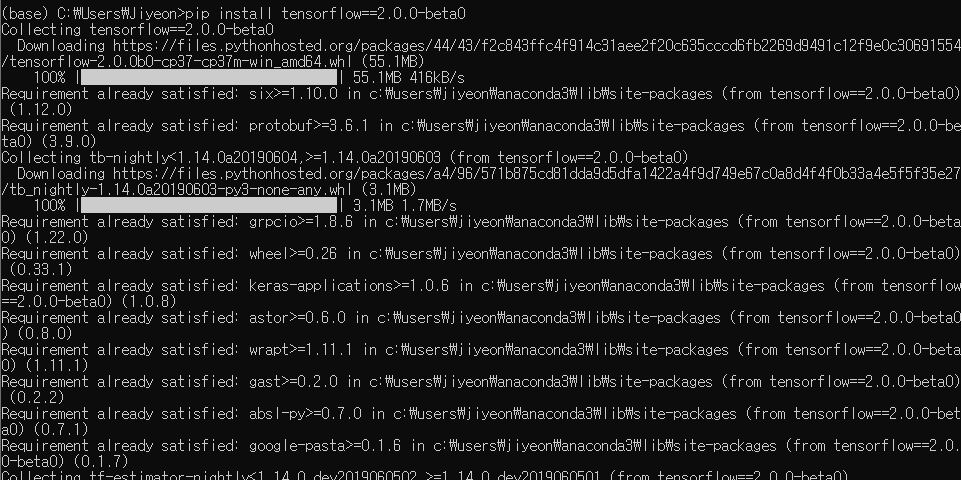

In [64]:
# __future__은 python 2와 3의 버전 차이로 인해 생기는 문제를 방지하고 호환이 되도록 하기 위해 사용합니다.
# print_function은 원하는 출력을 가능하게끔
# division python3스타일의 나누기 지원
# absolute import 표준 모듈과 동일한 이름의 로컬 모듈을 사용 가능하게 해줌
# 인용된 문자열은 바이트가 아닌 유니코드 시퀀스입니다.
#from __future__ import absolute_import, division, print_function, unicode_literals

# tensorflow & tf.keras import
import tensorflow as tf
from tensorflow import keras

# helper import
import numpy as np
import matplotlib.pyplot as plt


# tf -> tensorflow버전을 확인합니다.
print(tf.__version__)

1.15.0-dev20190804


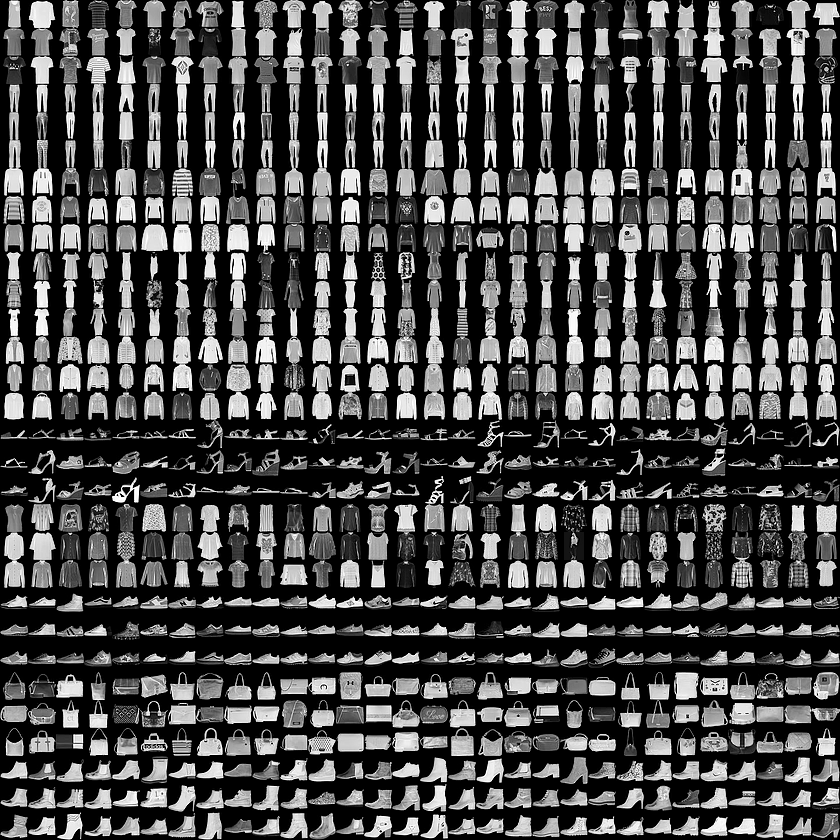

In [65]:
# fashion_mnist data set import
fashion_mnist = keras.datasets.fashion_mnist

# load_data() 함수를 호출하면 네 개의 넘파이(NumPy) 배열이 반환됩니다.
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [66]:
train_images

#train_labels

#test_images

#test_labels

#fashion_mnist

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

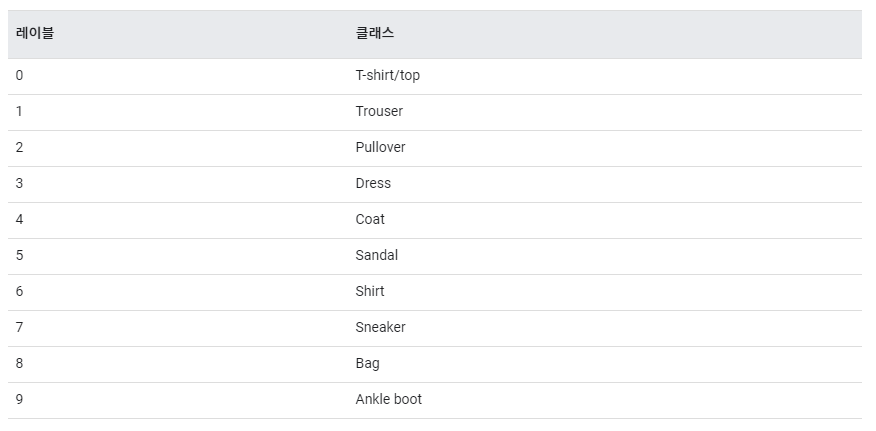

In [67]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 데이터 탐색

In [68]:
train_images.shape

(60000, 28, 28)

In [69]:
len(train_labels)

60000

In [70]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [71]:
test_images.shape

(10000, 28, 28)

In [72]:
len(test_labels)

10000

# 데이터 전처리

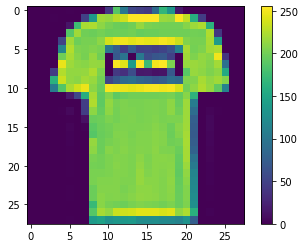

In [73]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [74]:
train_images = train_images / 255.0

test_images = test_images / 255.0

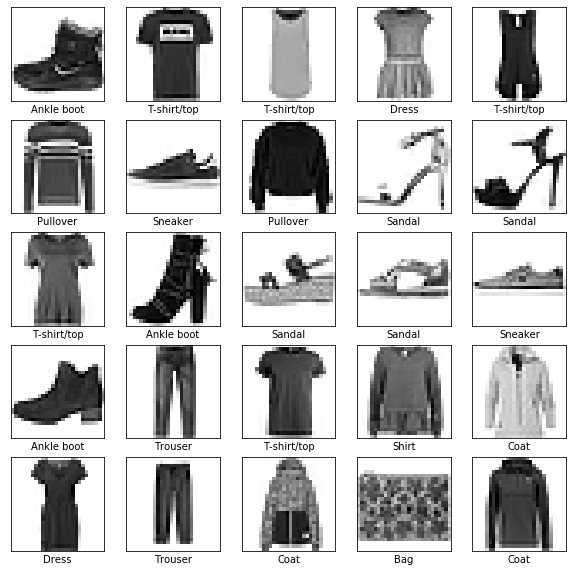

In [75]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# 모델 구성

## - 층 설정

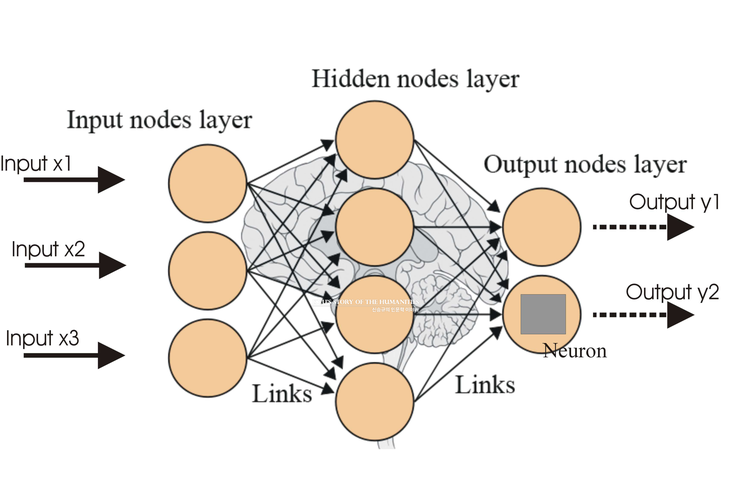

In [76]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


ReLU는 backpropagation이 진행될수록 전달 값들이 점점 희미해 지는 현상인 Vanishing Gradient를 없애기 위한 activation function입니다.

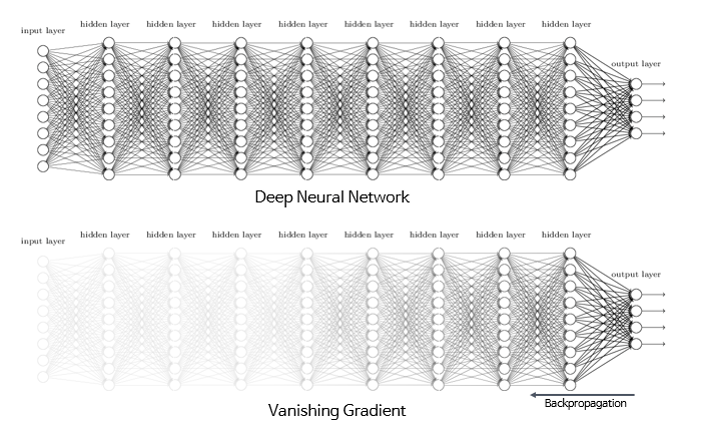

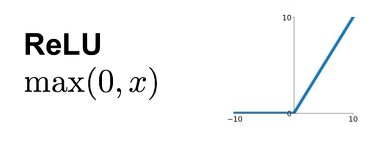

Softmax

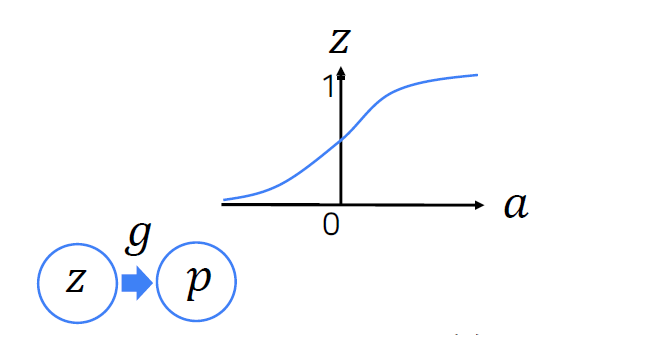

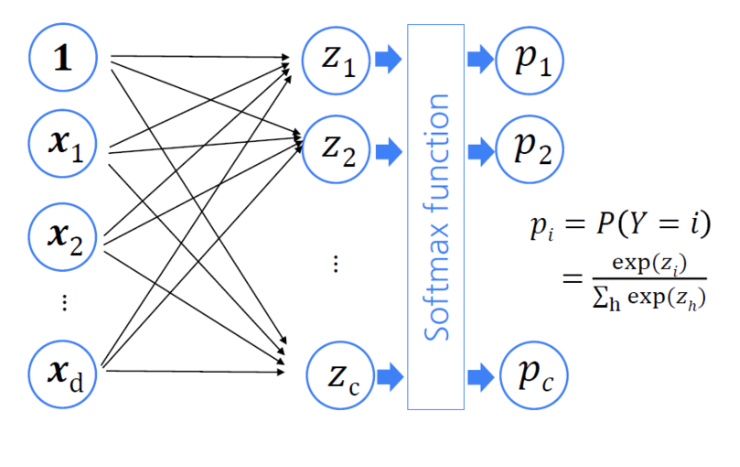

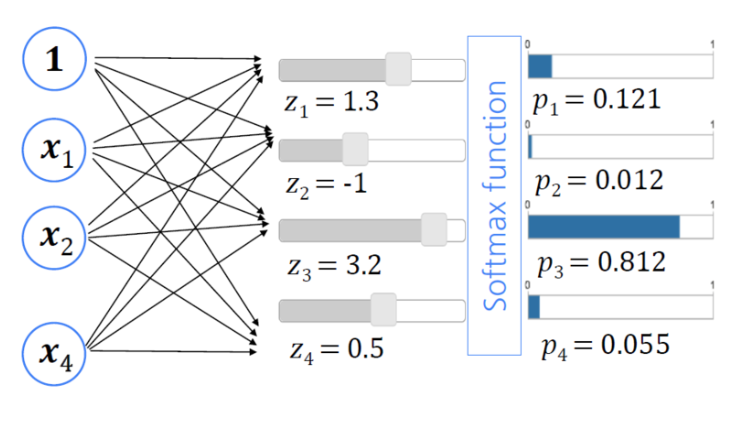

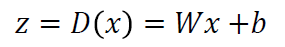

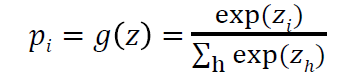

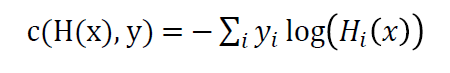

## - 모델 컴파일

Optimizer - 데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정합니다.

Loss function - 훈련 하는 동안 모델의 오차를 측정합니다. 모델의 학습이 올바른 방향으로 향하도록 이 함수를 최소화해야 합니다.

Metrics - 훈련 단계와 테스트 단계를 모니터링하기 위해 사용합니다. 다음 예에서는 올바르게 분류된 이미지의 비율인 정확도를 사용합니다.

Adam은 Optimizer의 한 방법으로 stepsize가 gradient의 rescaling에 영향 받지 않습니다. 

gradient가 커져도 stepsize는 bound되어 있어서 어떠한 objective function을 사용한다 하더라도 안정적으로 최적화를 위한 하강이 가능합니다.

In [77]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련

In [78]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.2)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.4935 - acc: 0.8262
Epoch 2/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.3759 - acc: 0.8647
Epoch 3/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.3354 - acc: 0.8780
Epoch 4/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3115 - acc: 0.8860
Epoch 5/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.2929 - acc: 0.8920


# 정확도 평가

In [79]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

#plt.imshow(test_images[0]);

#print('테스트 정확도:', test_acc) 

print(test_images)

10000/10000 [==============================] - 0s 26us/sample - loss: 0.3343 - acc: 0.8824
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

from numpy import array

test_label1 = [7 , 1]
#plt.imshow(test1)

test_num1 = plt.imread('D:/image/shirt.jpg')
test_num1 = test_num1[:,:,0]
test_num1 = (test_num1 > 125) * test_num1
test_num1 = test_num1.astype('float32') / 255.

test_num2 = plt.imread('D:/image/tshirt.jpg')
test_num2 = test_num2[:,:,0]
test_num2 = (test_num2 > 125) * test_num2
test_num2 = test_num2.astype('float32') / 255.

test_num=[[test_num1],
          [test_num2]]

test_num = array(test_num)

test_num = test_num.reshape((2, 28, 28))

print(test_num.shape)

#plt.imshow(test_num, cmap='Greys', interpolation='nearest');

#print('The Answer is ', model.predict_classes(test_num.reshape((1, 28, 28))))

test_loss1, test_acc1 = model.evaluate(test_num,test_label1)

print('테스트 정확도:', test_acc1) 

#print(model.predict_classes(test_num))

(2, 28, 28)
2/2 [==============================] - 0s 1ms/sample - loss: 19.8969 - acc: 0.0000e+00
테스트 정확도: 0.0


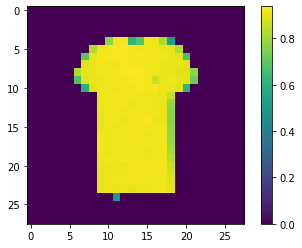

1/1 [==============================] - 0s 0s/sample - loss: 0.4015 - acc: 1.0000
테스트 정확도: 1.0


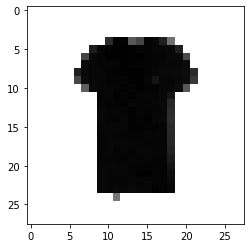

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline

test_label1 = [0]

test_num1 = plt.imread('D:/image/tshirt1.jpg')
test_num1 = test_num1[:,:,0]
test_num1 = (test_num1 > 125) * test_num1
test_num1 = test_num1/ 255.
plt.figure()
plt.imshow(test_num1)
plt.colorbar()
plt.grid(False)
plt.show()
plt.imshow(test_num1,cmap=plt.cm.binary);

test_num1 = test_num1.reshape((1, 28, 28))

test_loss1, test_acc1 = model.evaluate(test_num1,test_label1)

print('테스트 정확도:', test_acc1) 



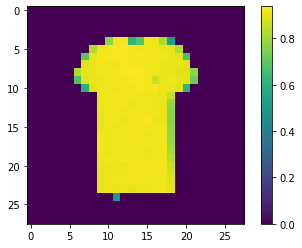

[[6.6929245e-01 1.6433022e-03 5.9276968e-03 1.4682951e-02 1.7144933e-03
  8.9304922e-05 2.1796924e-01 4.6101108e-05 8.8474780e-02 1.5962588e-04]]


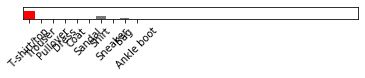

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
test_label1 = [7]

test_num1 = plt.imread('D:/image/tshirt1.jpg')
test_num1 = test_num1[:,:,0]
test_num1 = (test_num1 > 125) * test_num1
test_num1 = test_num1/ 255.
plt.figure()
plt.imshow(test_num1)
plt.colorbar()
plt.grid(False)
plt.show()
plt.imshow(test_num1,cmap=plt.cm.binary);

img = test_num1

img = (np.expand_dims(img,0))

predictions_single = model.predict(img)

print(predictions_single)


plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show() 

# 예측 만들기

In [22]:
predictions = model.predict(test_images)

In [23]:
predictions[0]

array([2.1329259e-07, 1.1411912e-08, 7.0270190e-08, 2.0531866e-08,
       7.3623426e-08, 1.3205320e-02, 1.0243128e-07, 4.5306813e-02,
       1.2782048e-05, 9.4147456e-01], dtype=float32)

In [24]:
np.argmax(predictions[0])

9

In [25]:
test_labels[0]

9

In [85]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

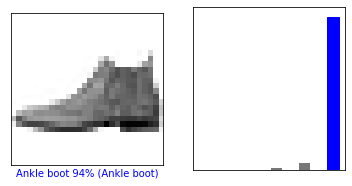

In [27]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

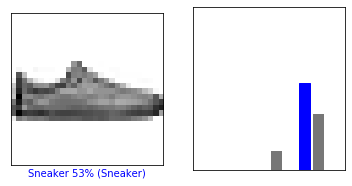

In [28]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

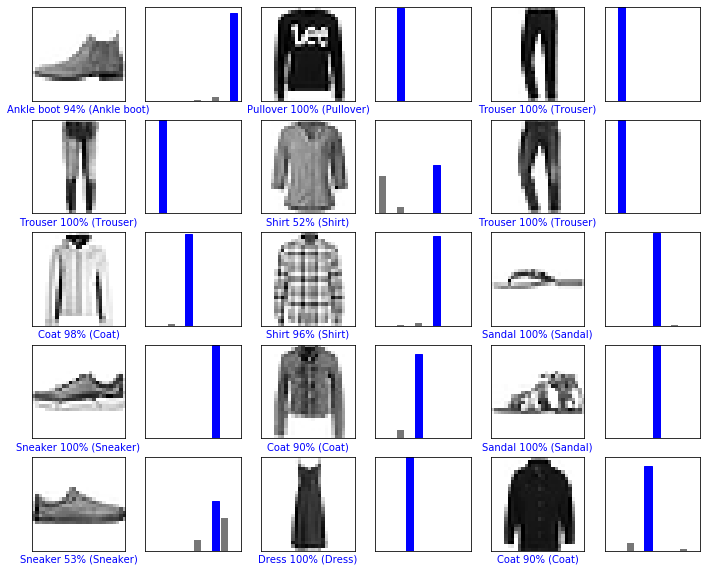

In [29]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [30]:
# 테스트 세트에서 이미지 하나를 선택합니다
img = test_images[0]

print(img.shape)            

(28, 28)


In [31]:
# 이미지 하나만 사용할 때도 batch에 추가합니다
img = (np.expand_dims(img,0))

print(img.shape)        

(1, 28, 28)


In [32]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.13292182e-07 1.14119345e-08 7.02700547e-08 2.05318660e-08
  7.36234256e-08 1.32053318e-02 1.02431081e-07 4.53067906e-02
  1.27820349e-05 9.41474557e-01]]


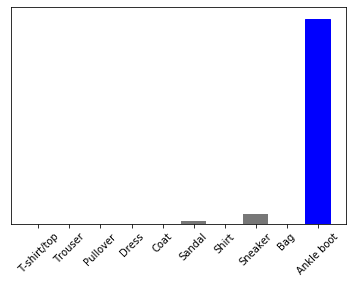

In [33]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show() 

In [34]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

9
